# Project 1 Analytics Programming 100 points
### Author (s) :
#### A) Omar M. Hussein
#### B) Julian Ruggiero
#### C) Lily Liu
### Submission Date: 9 / 29 / 2019

# Below you will find information about the Data and a Data Dictionary
### The flight attributes provided within the data set are as follows:
##### • Year, Month, DayofMonth: date of departure
##### • DayOfWeek: day of week of departure (useful for removing weekend effects)
##### • DepTime: departure time (in local time, hhmm)
##### • ArrTime: arrival time (in local time, hhmm)
##### • UniqueCarrier: unique abbreviation for a carrier
##### • FlightNum: flight number
##### • TailNum: airplane tail number
##### • ActualElapsedTime: elapsed time of flight, in minutes
##### • AirTime: flight time, in minutes
##### • ArrDelay: arrival delay, in minutes,
##### • DepDelay: departure delay, in minutes
##### • Origin: origin airport code
##### • Dest: destination airport code
##### • Distance: distance of flight, in miles
##### • TaxiIn: taxi in time in minutes
##### • TaxiOut: taxi out time in minutes
##### • Cancelled: cancelled indicator: 1 = Yes, 0 = No
##### • CancellationCode: reason for cancellation: A = carrier, B = weather, C = national air system, D = security
##### • Diverted: diverted indicator: 1 = Yes, 0 = No


In [42]:
# Importing all the necassary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#Loading our data set from github
filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"

# storing our flight data into a variable named fd
fd = pd.read_csv(filename)

#looking at the first 15 elements
fd.head(15)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0
5,2011,1,6,4,1359.0,1503.0,AA,428,N262AA,64.0,...,-7.0,-1.0,IAH,DFW,224,6.0,13.0,0,NaN,0
6,2011,1,7,5,1359.0,1509.0,AA,428,N493AA,70.0,...,-1.0,-1.0,IAH,DFW,224,12.0,15.0,0,NaN,0
7,2011,1,8,6,1355.0,1454.0,AA,428,N477AA,59.0,...,-16.0,-5.0,IAH,DFW,224,7.0,12.0,0,NaN,0
8,2011,1,9,7,1443.0,1554.0,AA,428,N476AA,71.0,...,44.0,43.0,IAH,DFW,224,8.0,22.0,0,NaN,0
9,2011,1,10,1,1443.0,1553.0,AA,428,N504AA,70.0,...,43.0,43.0,IAH,DFW,224,6.0,19.0,0,NaN,0


In [43]:
#Viewing the number of records and coloumns
fd.shape

(20000, 21)

# Pre-Processing & Answering the analytical questions questions:

###### A) Removing the unnecessary Column and Renaming the remaining ones

From viewing the data we Suspect that there may be a problem with the cancellationcode attribute we will now further investigate that to disallow further hindrance in the project

In [44]:
# Checking to see whether or not all flights are in the same year
is_2011 = (fd['Year'] == 2011).sum()
print(f"Number of flights of year 2011 is: {is_2011}")

#what are the number of NaN / na / Empty attributes that are present
empty = fd['CancellationCode'].isnull().sum()
cancelled = (fd['Cancelled'] == 0).sum()

#number of empty attributes in the coloumn
print(f"Number of empty attributes in CancellationCode column: {empty}")
print(f"The same number is found veryfing the Cancelled column with values '0': {cancelled}")

#total length
print(f"Total records: {fd.shape[0]}" )
# getting the total number of missing values in the cancellation code coloumn
print(f"N° of missing Values in the cancellation Code column: {(empty*100/fd.shape[0])} % ")

#the remaining
print(f"Remaining: {fd.shape[0] - empty} (cancelled flights)")

Number of flights of year 2011 is: 20000
Number of empty attributes in CancellationCode column: 19776
The same number is found veryfing the Cancelled column with values '0': 19776
Total records: 20000
N° of missing Values in the cancellation Code column: 98.88 % 
Remaining: 224 (cancelled flights)


The amount of missing Values in the cancellation Code amount to 98.88% of the total available then a verdict should be made for the CancellationCode to be removed (to answer some of our questions) because it is not informing us correctly.

In [45]:
# remove the unnecassary coloumn from the Data
del fd['CancellationCode']
# Verify the removal
fd.head(4)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,40.0,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,45.0,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,48.0,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,39.0,3.0,3.0,IAH,DFW,224,9.0,22.0,0,0


In [46]:
# Counting the Number of available cols so we can be sure that we did not miss any.
print(len(fd.columns))
# what coloumn names do we have ?
fd.columns

20


Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'Diverted'],
      dtype='object')

In [47]:
# a list with all the new names
new_names= ['Year', 'Month','Day_month','Day_week', 'DepTime', 'ArrTime','Carrier','FlightNum', 'TailNum',
           'ElapsedTime','AirTime','ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
           'TaxiOut', 'Cancelled', 'Diverted']
# making sure that we covered all the coloumns
len(new_names)

20

In [51]:
# Keeping not of all the changes in the names.
# renaming The Coloumns to make them easier to deal with.
'''
DayofMonth to Day_month.
DayOfWeek to Day_week.
ActualElapsedTime to ElapsedTime.
UniqueCarrier to Carrier.
'''

fd.columns = new_names
fd.columns

Index(['Year', 'Month', 'Day_month', 'Day_week', 'DepTime', 'ArrTime',
       'Carrier', 'FlightNum', 'TailNum', 'ElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted'],
      dtype='object')

In [52]:
fd.head(3)# viewing the first three elements to check whether or not the absolute value took effect

,Year,Month,Day_month,Day_week,DepTime,ArrTime,Carrier,FlightNum,TailNum,ElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,40.0,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,45.0,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,48.0,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,0


In [53]:
fd.tail(3)# viewing the last three elements to check whether or not the absolute value took effect

,Year,Month,Day_month,Day_week,DepTime,ArrTime,Carrier,FlightNum,TailNum,ElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
19997,2011,2,25,5,722.0,948.0,CO,1746,N37408,146.0,115.0,-17.0,-3.0,IAH,ORD,925,17.0,14.0,0,0
19998,2011,2,25,5,1909.0,2216.0,CO,1748,N27239,127.0,106.0,-10.0,12.0,IAH,FLL,965,6.0,15.0,0,0
19999,2011,2,25,5,1255.0,1553.0,CO,1757,N14604,118.0,83.0,-3.0,5.0,IAH,ATL,689,13.0,22.0,0,0


#### To make the data more readable (and understandable) we collected the associated name for each UniqueCarrier initials from the following sources:
https://aspmhelp.faa.gov/index.php/ASQP:_Carrier_Codes_and_Names

https://www.census.gov/foreign-trade/reference/codes/aircarrier/acname.txt

In [72]:
fd.Carrier.replace({'AS': 'Alaska Airlines', 
                             'F9': 'Frontier Airlines',
                             'B6': 'Jetblue Airways Corporation',
                             'UA': 'United Airlines',
                             'EV': 'Atlantic Southeast Airlines',
                             'FL': 'AirTran Airways',
                             'DL': 'Delta Air Lines',
                             'US': 'Piedmont Airlines',
                             'MQ': 'Envoy Air',
                             'AA': 'American Airlines',
                             'OO': 'SkyWest  Airlines',
                             'WN': 'Southwest Airlines',
                             'XE': 'ExpressJet Airlines',
                             'CO': 'Continental Airlines'}, inplace = True)

### B) Data Exploration
##### Before moving on to subsetting the data into dataframes for our questions lets explore the unique values in the data first that is due to the fact that exploring the data should provide us with a better understanding of what the data is and how to utlise it.

We have successfully created a loop that automatically does this for us

In [83]:
'''
The goal of this for loop is to view all the unique values in every coloumn so we can know the elements of the each coloumn 
which should provide us with a better understanding of the matter at hand
'''
# looping through all the attributes available
for i in new_names:
    # priting the name of the attribute
    print(str(i))
    # printing all the unique variables per attribute
    print(set(fd[str(i)]))
    # leaving some space between the current attribute and the next one
    print("\n\n")

Year
{2011}



Month
{1, 2}



Day_month
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}



Day_week
{1, 2, 3, 4, 5, 6, 7}



DepTime
{nan, nan, nan, nan, nan, nan, nan, nan, nan, 4.0, 5.0, 11.0, nan, nan, nan, nan, 17.0, 22.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 226.0, 537.0, 538.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 549.0, 550.0, 551.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 600.0, 601.0, 602.0, 603.0, 604.0, 605.0, 606.0, 607.0, 608.0, 609.0, 610.0, 611.0, 612.0, 613.0, 614.0, 615.0, 616.0, 617.0, 618.0, 620.0, 623.0, 624.0, 625.0, 626.0, 627.0, 628.0, 629.0, 630.0, 631.0, 632.0, 633.0, 634.0, 635.0, 636.0, 637.0, 638.0, 639.0, 640.0, 641.0, 642.0, 643.0, 644.0, 645.0, 646.0, 647.0, 648.0, 650.0, 651.0, 652.0, 653.0, 654.0, 655.0, 656.0, 657.0, 658.0, 659.0, 700.0, 701.0, 702.0, 7

##### C) Subsetting the data to something we can work with

# We will subset the data according to the need of every Analytical Question.
## Question 1
##### As a StakeHolder we would like to know on which day of the week of every month were the carriers likely to Cancel their flights ?,also which Carrier has the most Flight Cancelations ?
###### Our reasoning for that is that if we determine the days were we are more likely to cancel we would hire less resourses on those days to save money or at the very least investigate if there is anything that we could do in the event of cancellation so it does not surprise us.
 For the first Question we only need Month, day_week , Cancelled

### Plan of Attack :
- For the first part of the question we would divide the data set into two parts one for Cancellation on January and the second is for the cancellation on February, and then visualise both

- The way are going to approach this is by first getting all the attributes involved in finding the answers to our question and storing that into a data frame as visualise which carriers have the highest cancellation rate.

In [74]:
# subsetting the flight data frame into smaller sets and store it into the variable q1 
# which stores all the data needed for question1
q1 = fd[['Month','Day_week','Cancelled']].copy()
# viewing the first 4
q1.head(4)

,Month,Day_week,Cancelled
0,1,6,0
1,1,7,0
2,1,1,0
3,1,2,0


#### Splitting the data set further into the two available month which are January and February

In [75]:
Jan = q1[q1['Month']== 1] # january
Feb = q1[q1['Month']== 2] # february

For January the highest number of cancellations is  67


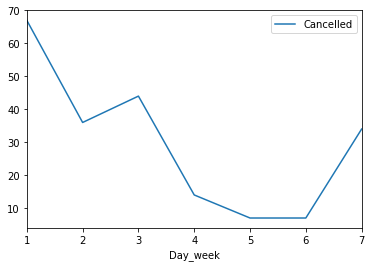

In [76]:
j1=Jan[Jan['Day_week'] == 1].copy()

# In January the Most amount of cancellations are usually on Monday which is Day on
print("For January the highest number of cancellations is ",sum(j1['Cancelled']== 1))
#  ------------------------------------------------------------------------------------  #
# subsetting it into only the cancelled ones in Jan
q1b=Jan[(Jan['Cancelled'] == 1)]
q1b=q1b[['Day_week','Cancelled']]
# plotting the line graph
line1=q1b.groupby(['Day_week']).count()
line1.plot();


#### We can see that for January Mondays are likely to have more cancellations that the other days and Fridays along with Saturday the least amount of cancelations. 

7


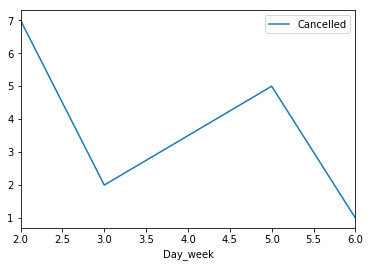

In [77]:

# this is the day that has the most cancellation
f2=Feb[Feb['Day_week'] == 2].copy()

# In February the day that has most cancellations is Tuesday.
# But its not all that bad, the exact value is 7
print(sum(f2['Cancelled']== 1))

#  ------------------------------------------------------------------------------------  #
q2b=Feb[(Feb['Cancelled'] == 1)]
q2b=q2b[['Day_week','Cancelled']]
line2=q2b.groupby(['Day_week']).count()
line2.plot();

#### For February things are a little bit different, Tuesdays are more likely to have a high number of cancellations.

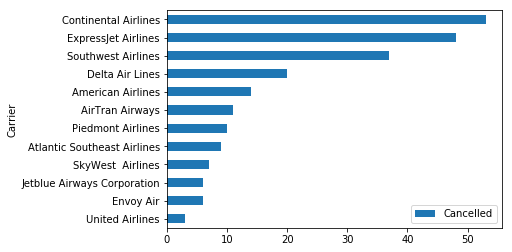

In [80]:
# printing the bar graph for the cancelled sections and grouping them by carrier
bar1=fd[(fd['Cancelled'] == 1)][['Carrier','Cancelled']].copy()
bar1.groupby(['Carrier']).count().sort_values('Cancelled', ascending=True).plot.barh();

# Conclusion for question 1

    -So from the previous we also Knew that the highest cancellation overall for Carriers belongs to 'C0', So we need to investigate why is that further with CO or report to the manager
    - In January, Monday has the highest cancellation, so we need to allocate slightly less resources on that day
    - In February,Tuesday has the highest cancellation, every thing should stay as is because the cancellation was too small it is negligible
    - Acording to the analysis and the bar graph above we can see that Continental Airlines have more than 50 flights cancelled, followed by ExpressJet and Southwest Airlines

## Question 2
##### As a StakeHolder we would like to know did any of our Pilots (Flight Number) went over the Recommended Speed ? which is 575 mph
##### Our reasoning for that is that it is imperative to know whether or not the pilots at some point exceeded the assuming that the speed is uniform ?
For the second question we only need AirTime,Distance,[ FlightNum,TailNum,Carrier] this give us our pilot ID 

## Plan of Attack
    -We need to subset the data frame further into merely the data that we need
    -We should compute the AirSpeed
    -We should visualise it and provide a statistical summary

In [91]:
# Subsetting it into only the needed values to answer question 2
q2 = fd[['FlightNum','TailNum','Carrier','AirTime','Distance']].copy()
# Viewing the first 4 elements
q2.head(4)

,FlightNum,TailNum,Carrier,AirTime,Distance
0,428,N576AA,American Airlines,40.0,224
1,428,N557AA,American Airlines,45.0,224
2,428,N541AA,American Airlines,48.0,224
3,428,N403AA,American Airlines,39.0,224


In [92]:
# Getting the speed by dividy the distance by the time in hours instead of minutes
q2['AirSpeed']=q2['Distance']/(q2['AirTime']/60)
#Showing the first 4 rows
q2.head(4)


,FlightNum,TailNum,Carrier,AirTime,Distance,AirSpeed
0,428,N576AA,American Airlines,40.0,224,336.000000
1,428,N557AA,American Airlines,45.0,224,298.666667
2,428,N541AA,American Airlines,48.0,224,280.000000
3,428,N403AA,American Airlines,39.0,224,344.615385


In [93]:
# what is the statistical summary of the air speed
# as you can see the values are below 575 which is good to know
q2['AirSpeed'].describe()

count    19738.000000
mean       421.973473
std         69.958644
min        168.000000
25%        377.368421
50%        425.581395
75%        476.347826
max        670.000000
Name: AirSpeed, dtype: float64

In [94]:
# this is the highest speed and it is cleary way above 575
q2['AirSpeed'].describe()[-1]

670.0

In [95]:
# there are a 9 flights that were above the speed limit
sum(q2['AirSpeed']>575)

9

In [96]:
# here are all the flight information that can lead us to the pilots who broke protocol
q2_subset = q2[q2['AirSpeed']>575][['FlightNum','TailNum','Carrier']]
# viewing the first 10 elements
q2_subset.head(10)

,FlightNum,TailNum,Carrier
201,1700,N3FRAA,American Airlines
1558,258,N76526,Continental Airlines
4271,310,N57868,Continental Airlines
7325,552,N479UA,United Airlines
8318,5229,N451CA,Atlantic Southeast Airlines
14522,2171,N18120,ExpressJet Airlines
19193,620,N607JB,Jetblue Airways Corporation
19491,408,N78060,Continental Airlines
19964,1542,N35204,Continental Airlines


In [97]:
# getting the average speed per carrier
q2=q2[['Carrier','AirSpeed']]
q2a=q2.groupby(['Carrier']).mean()
q2a

,AirSpeed
Carrier,
AirTran Airways,467.008484
Alaska Airlines,421.831808
American Airlines,381.752096
Atlantic Southeast Airlines,464.463395
Continental Airlines,443.746553
Delta Air Lines,460.963282
Envoy Air,370.117350
ExpressJet Airlines,413.190477
Frontier Airlines,407.988845


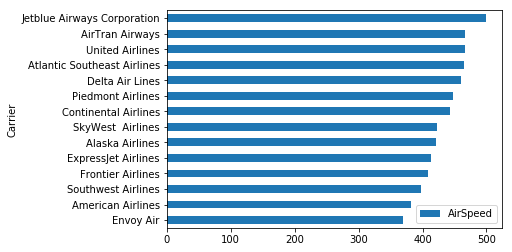

In [102]:
# printing the bar graph for the cancelled sections and grouping them by carrier
q2_subset2=q2[['Carrier','AirSpeed']].copy()
q2_subset2.groupby(['Carrier']).mean().sort_values('AirSpeed', ascending=True).plot.barh();

# Conclusion for Question 2
    - Only 9 flights exceeded the required limit with a maximum speed of 670, so they should be investigated but overall the flights are following the rules
    - The flights with highest average speed belong to Jetblue Airways Corporation but even then the only crossed the speed limit in only one flight

## Question 3
#####  Which Carriers have the Highest Delay time ?
##### Our reasoning for that if a specific carrier is not doing so good , then you have to investigate what is the issue to either fix the problem if possible. because it might not be their fault maybe the officials that are working within the airport are just inept

#### Plan of Attack
    - The total time delay should be computer as follows tot_delay = ArrDelay +	DepDelay
    - Visualising and providing a statistical summary

In [103]:
# getting the values from fd
q3 = fd.copy()
# creating a new coloumns with the total delay
q3['total_delay']=q3['ArrDelay']  + q3['DepDelay']

# Getting all the necassary attributes to answer the question
q3=q3.iloc[:,2:]

q3 = q3.iloc[:,[0,4,5,8,18]]

# making sure that we got it right
q3.sort_values(by=['total_delay'],ascending=False).head()

,Day_month,Carrier,FlightNum,AirTime,total_delay
2502,20,Continental Airlines,59,126.0,1555.0
6532,15,Delta Air Lines,1590,94.0,975.0
8256,5,Atlantic Southeast Airlines,5003,78.0,910.0
936,28,Continental Airlines,1,463.0,677.0
8266,24,Atlantic Southeast Airlines,5003,83.0,613.0


In [104]:
q3.describe()[1:]

,Day_month,FlightNum,AirTime,total_delay
mean,16.319000,1626.416900,105.584355,13.476593
std,9.025692,1142.067143,57.655970,48.143619
min,1.000000,1.000000,23.000000,-59.000000
25%,8.000000,582.000000,54.000000,-9.000000
50%,17.000000,1644.000000,102.000000,0.000000
75%,25.000000,2536.000000,138.000000,19.000000
max,31.000000,7037.000000,499.000000,1555.000000


In [105]:
q3=q3[['Carrier','total_delay']].groupby(['Carrier']).mean().sort_values(by=['total_delay'],ascending=False)
q3

,total_delay
Carrier,
Atlantic Southeast Airlines,34.989583
Jetblue Airways Corporation,29.430108
Southwest Airlines,22.993182
Frontier Airlines,20.032258
Envoy Air,17.046154
Continental Airlines,15.226393
Alaska Airlines,14.120690
SkyWest Airlines,12.481858
Delta Air Lines,12.344538


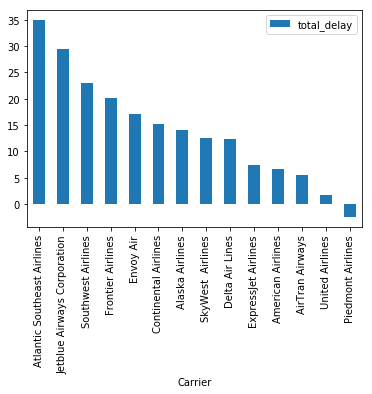

In [108]:
q3.plot.bar();

## Conclusion
- The delays aren't exactly catastrophic most of them are doing well however Atlantic Southeast Airlines, Jetblue Airways  Corporation, Southwest Airlines and Frontier Airlines have considerably high averages (over 20 min in AVG) so we think that they should copy what ever model Piedmont Airlines carrier is using in order to lessen their delay time

##### Variable Dictionary:
##### fd means flight data frame
##### Jan is the data frame that has all the cancelled flights in January
##### Feb is the data frame that has all the cancelled flights in February
##### q1 means question 1 data frame
##### q2 means question 2 data frame
##### q3 means question 3 data frame
##### The added coloumn for the data frame named AirSpeed


# Narrative Summary
#### Question: As a StakeHolder we would like to know on which day of the week of every month were the carriers likely to Cancel  their flights ? Also which Carrier has the most Flight Cancelations ?

#### Reason of this question: if we determine the days were we are more likely to cancel we would hire less resourses on those days to save money or at the very least investigate if there is anything that we could do in the event of cancellation so it does not surprise us.¶

#### To start, we subset the flight data frame into smaller sets and store it into the variable q1. Then we Split the data set further into the two available month which are January and February.

#### Results: In January the Most amount of cancellations are usually on Monday. This Day has the Highest Number of Cancellations 67.In February the day that has most cancellations is Tuesday which is 7. 

#### Next, We print the bar graph for the cancelled sections and grouping them by carrier, we also found that the highest cancellation for Carriers belongs to 'C0'.

#### picture the problem. What’s the issue with the situation? Wherein lies the pain you’re trying to solve?
#### Solution: Present the solution. How do you solve the problem? How do you cure the pain? Next Steps: You convinced the audience. What are the next steps you need to take? Which actions need to be taken?

#### Question:  As a StakeHolder i Would like to know did any of our Pilots (Flight Number) went over the Recommended Speed ? which is 575 mph.

##### The reasoning for that is that it is imperative to know whether or not the pilots at some point exceeded the assuming that the speed is uniform ?

##### To start, we Subset it into only the needed values to answer question 2, then we View the first 4 elements. Solution: We Got the speed by dividy the distance by the time in hours instead of minutes. The summary statistic of the air speed shows the values are below 575. 

##### Results: There are a 9 flights that were above the speed limit. We also got the average speed per carrier.

##### Qustion: Which Carriers have the Highest Delay time ?

##### The reasoning: if a specific carrier is not doing so good , then you have to investigate what is the issue.  Either fix the problem if possible. The total delay time = ArrDelay + DepDelay

##### To start, We got the values from fd,creating a new coloumns with the total delay，

##### Solution: We used decriptin statistics.

##### Results: The delays aren't exactly catastrophic. Most of them are doing well, however Atlantic Southeast Airlines, Jetblue Airways Corporation, Southwest Airlines and Frontier Airlines have considerably high averages (over 20 min in AVG). So we think that they should copy what ever model Piedmont Airlines carrier is using, in order to lessen their delay time.


# Thank You, Best Regards From Omar M.H , Julian and Lily